In [1]:
import networkx as nx
import numpy as np 
from matplotlib import pyplot as plt
import collections
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import KMeans
from scipy.sparse import dok_matrix
from scipy.sparse import csgraph
import time
from scipy.spatial import KDTree
from scipy.spatial import cKDTree
from scipy.sparse.csgraph import minimum_spanning_tree
import scipy.sparse as sps
import json
import pickle
import seaborn as sns
from zahn import Zahn
from template import Template_5

# Load TS and algorithms

In [2]:
with open('data/series.json') as fp:
    series_26 = json.load(fp)

In [3]:
with open('fitted/zahn_1111', 'rb') as fp:
    zahn_1111 = pickle.load(fp)

In [4]:
with open('fitted/zahn_1112', 'rb') as fp:
    zahn_1112 = pickle.load(fp)

In [5]:
with open('fitted/zahn_1121', 'rb') as fp:
    zahn_1121 = pickle.load(fp)

In [6]:
with open('fitted/zahn_1211', 'rb') as fp:
    zahn_1211 = pickle.load(fp)

In [7]:
with open('fitted/zahn_2111', 'rb') as fp:
    zahn_2111 = pickle.load(fp)

In [8]:
with open('fitted/zahn_1122', 'rb') as fp:
    zahn_1122 = pickle.load(fp)

In [9]:
with open('fitted/zahn_1221', 'rb') as fp:
    zahn_1221 = pickle.load(fp)

In [10]:
with open('fitted/zahn_2211', 'rb') as fp:
    zahn_2211 = pickle.load(fp)

In [11]:
with open('fitted/zahn_1222', 'rb') as fp:
    zahn_1222 = pickle.load(fp)

In [12]:
with open('fitted/zahn_2221', 'rb') as fp:
    zahn_2221 = pickle.load(fp)

In [ ]:
with open('fitted/zahn_3333', 'rb') as fp:
    zahn_3333 = pickle.load(fp)

In [ ]:
with open('fitted/zahn_4444', 'rb') as fp:
    zahn_4444 = pickle.load(fp)

In [ ]:
with open('fitted/zahn_5555', 'rb') as fp:
    zahn_5555 = pickle.load(fp)

In [ ]:
with open('fitted/zahn_6666', 'rb') as fp:
    zahn_6666 = pickle.load(fp)

In [ ]:
with open('fitted/zahn_7777', 'rb') as fp:
    zahn_7777 = pickle.load(fp)

In [ ]:
with open('fitted/zahn_8888', 'rb') as fp:
    zahn_8888 = pickle.load(fp)

In [ ]:
with open('fitted/zahn_9999', 'rb') as fp:
    zahn_9999 = pickle.load(fp)

In [13]:
zahn_1111.template.n1

1

In [13]:
def get_averages(zahn):
    comp_fifth_avg = []
    comp_four = []
    for component in zahn.clusters:
        comp_fifth_avg.append(np.mean([i[-1] for i in component]))
        comp = []
        for vec in component:
            comp.append(vec[:-1])
        comp_four.append(np.array(comp))
    centers = np.array([np.mean(x,axis=0) for x in comp_four])
    zahn.comp_fifth_avg = comp_fifth_avg
    zahn.comp_four = comp_four
    zahn.centers = centers
    zahn.centers_ktree = cKDTree(data=centers)

In [14]:
len(zahn_1111.clusters[0][0])

5

In [16]:
def get_average_poind_distance(zahn):
    dists = []
    for component in zahn.clusters:
        for vec in component:
            for i in range(1,5):
                dists.append(abs(vec[i]-vec[i-1]))
    return np.mean(dists)

In [ ]:
get_averages(zahn_1111)



In [15]:
get_averages(zahn_1111)
get_averages(zahn_1112)
get_averages(zahn_1121)
get_averages(zahn_1211)
get_averages(zahn_2111)
get_averages(zahn_1122)
get_averages(zahn_1221)
get_averages(zahn_2211)
get_averages(zahn_1222)
get_averages(zahn_2221)


In [ ]:
get_averages(zahn_3333)
get_averages(zahn_4444)
get_averages(zahn_5555)
get_averages(zahn_6666)
get_averages(zahn_7777)
get_averages(zahn_8888)
get_averages(zahn_9999)

In [16]:
test = series_26[749993:]
# starting point 750k
start_ind = 107

In [19]:
algos = [zahn_1111]

In [17]:
algos = [
    zahn_1111,
    zahn_1112,
    zahn_1121,
    zahn_1211,
    zahn_2111,
    zahn_1122,
    zahn_1221,
    zahn_2211,
    zahn_1222,
    zahn_2221,
    #zahn_3333,
    #zahn_4444,
    #zahn_5555,
    #zahn_6666,
    #zahn_7777,
    #zahn_8888,
    #zahn_9999
]

In [18]:
len(algos)

10

In [19]:
avg_dists = [get_average_poind_distance(x) for x in algos]

NameError: name 'get_average_poind_distance' is not defined

In [ ]:
avg_dists

In [24]:
for algo in algos:
    clusters = [len(x) for x in algo.clusters]
    print(np.mean(clusters), np.max(clusters))

25.042153484071616 894
24.71713214541472 720
24.759968202167272 873
24.484148307361632 820
24.89450291416831 826
24.038048861010235 1381
24.033267212166294 891
24.10320065654493 766
23.846112333430195 1447
23.968612105569893 2136


In [25]:
series_26[20-3*4:20:3]

[9.003825728926806, 0.19644664325328165, -9.23337320456448, -6.791052079933629]

In [26]:
series_26[:21]

[0.17450535575235093,
 0.05839779137295202,
 0.0440992367971854,
 0.07365239735349076,
 0.16709482839859596,
 0.42488173619505915,
 1.1512027438326828,
 3.2420943890612737,
 9.003825728926806,
 17.738817135348246,
 10.85671527650478,
 0.19644664325328165,
 -3.639546692654738,
 -6.10234542743075,
 -9.23337320456448,
 -11.602296265054646,
 -10.122545894729798,
 -6.791052079933629,
 -5.085939533368512,
 -5.540926342565781,
 -7.790132496015106]

In [25]:
def get_zvec_for_template(series,i,t):
    s = t.n1 + t.n2 + t.n3 + t.n4
    i4 = i - s
    i3 = i - t.n2 - t.n3 - t.n4
    i2 = i - t.n3 - t.n4
    i1 = i - t.n4
    vec = np.array([series[i4],series[i3],series[i2],series[i1]])
    return vec

In [26]:
def get_zvecs_for_algos(series,i,algos):
    return [get_zvec_for_template(series,i,a.template) for a in algos]

In [27]:
get_zvecs_for_algos(series_26,400,algos)

[array([ 5.73317892, 11.56599511, 14.61231135,  8.68883898]),
 array([ 2.81451541,  5.73317892, 11.56599511, 14.61231135]),
 array([ 2.81451541,  5.73317892, 11.56599511,  8.68883898]),
 array([ 2.81451541,  5.73317892, 14.61231135,  8.68883898]),
 array([ 2.81451541, 11.56599511, 14.61231135,  8.68883898]),
 array([ 1.73429277,  2.81451541,  5.73317892, 14.61231135]),
 array([ 1.73429277,  2.81451541, 11.56599511,  8.68883898]),
 array([ 1.73429277,  5.73317892, 14.61231135,  8.68883898]),
 array([ 1.92326286,  1.73429277,  5.73317892, 14.61231135]),
 array([ 1.92326286,  2.81451541, 11.56599511,  8.68883898])]

In [52]:
get_zvecs_for_prediction(series_26,400)

[[5.733178918007049, 11.565995106874393, 14.612311347142604, 8.68883898286062],
 [2.8145154083330493,
  5.733178918007049,
  11.565995106874393,
  14.612311347142604],
 array([ 2.81451541,  5.73317892, 11.56599511,  8.68883898]),
 array([ 2.81451541,  5.73317892, 14.61231135,  8.68883898]),
 array([ 2.81451541, 11.56599511, 14.61231135,  8.68883898]),
 array([ 1.73429277,  2.81451541,  5.73317892, 14.61231135]),
 array([ 1.73429277,  2.81451541, 11.56599511,  8.68883898]),
 array([ 1.73429277,  5.73317892, 14.61231135,  8.68883898]),
 array([ 1.92326286,  1.73429277,  5.73317892, 14.61231135]),
 array([ 1.92326286,  2.81451541, 11.56599511,  8.68883898])]

In [ ]:
def get_zvecs_for_prediction(series,i,short=False):
    vec_1111 = series[i-4:i]
    vec_1112 = series[i-5:i-1]
    vec_1121 = np.array([series[i-5],series[i-4],series[i-3],series[i-1]])
    vec_1211 = np.array([series[i-5],series[i-4],series[i-2],series[i-1]])
    vec_2111 = np.array([series[i-5],series[i-3],series[i-2],series[i-1]])
    vec_1122 = np.array([series[i-6],series[i-5],series[i-4],series[i-2]])
    vec_1221 = np.array([series[i-6],series[i-5],series[i-3],series[i-1]])
    vec_2211 = np.array([series[i-6],series[i-4],series[i-2],series[i-1]])
    vec_1222 = np.array([series[i-7],series[i-6],series[i-4],series[i-2]])
    vec_2221 = np.array([series[i-7],series[i-5],series[i-3],series[i-1]])
    vec_3333 = series[i-3*4:i:3]
    vec_4444 = series[i-4*4:i:4]
    vec_5555 = series[i-5*4:i:5]
    vec_6666 = series[i-6*4:i:6]
    vec_7777 = series[i-7*4:i:7]
    vec_8888 = series[i-8*4:i:8]
    vec_9999 = series[i-9*4:i:9]
    vecs = [vec_1111,vec_1112,vec_1121,vec_1211,vec_2111,vec_1122,vec_1221,vec_2211,vec_1222,vec_2221]#,vec_3333,vec_4444,vec_5555,vec_6666,vec_7777,vec_8888,vec_9999]
    if short:
        vecs = vecs[:-2]
    return vecs

In [20]:
def predict_zvec(zahn,zvec):
    dist,ind = zahn.centers_ktree.query(zvec)
    pred = zahn.comp_fifth_avg[ind]
    return pred, dist

In [21]:
def predict_point(series,i,short=False):
    min_dist = 100000
    cur_pred = 0
    zvecs_list = get_zvecs_for_algos(series,i,algos)
    for i in range(len(zvecs_list)):
        pred, dist = predict_zvec(algos[i],zvecs_list[i])
        if dist < min_dist:
            min_dist = dist
            cur_pred = pred
    return cur_pred,min_dist

In [22]:
def predict_point_avg(series,i):
    preds = []
    dists = []
    zvecs_list = get_zvecs_for_algos(series,i,algos)
    for i in range(len(zvecs_list)):
        pred, dist = predict_zvec(algos[i],zvecs_list[i])
        preds.append(pred)
        dists.append(dist)
    return np.mean(preds), np.mean(dists)

In [23]:
def predict_point_avg_with_errors(series,i,eps=1.2):
    preds = []
    dists = []
    zvecs_list = get_zvecs_for_algos(series,i, algos)
    for i in range(len(zvecs_list)):
        pred, dist = predict_zvec(algos[i],zvecs_list[i])
        if dist < eps*avg_dists[i]:
            preds.append(pred)
            dists.append(dist)
    return np.mean(preds), np.mean(dists)

In [28]:
predict_point_avg(test,500)

(2.1834447740871132, 0.15387557888279804)

In [29]:
test[500]

2.1566097514564335

In [30]:
preds_len = 2000

In [41]:
def get_preds(series,start,n=20):
    preds = []
    dists = []
    errors = []
    sq_errors = []
    step = 0
    series_dummy = series[:start]
    for i in range(start,start+preds_len):
        if step >= n:
            preds.append(series[i])
            series_dummy.append(series[i])
            step += 1
            if step == n + 7:
                step = 0
        else:
            pred, dist = predict_point_avg(series_dummy,i)
            dists.append(dist)
            preds.append(pred)
            errors.append(abs(series[i]-pred) / max(series))
            mse = (series[i] / max(series) - pred/ max(series))**2
            sq_errors.append(mse)
            series_dummy.append(pred)
            step += 1
    return preds, dists, np.mean(errors), np.mean(sq_errors), np.mean(sq_errors)**(1/2)

In [32]:
def get_preds_and_errors(series,start,n=50):
    preds = []
    dists = []
    errors = []
    step = 0
    steps = []
    series_dummy = series[:start]
    for i in range(start,start+preds_len):
        if step >= n:
            preds.append(series[i])
            series_dummy.append(series[i])
            step += 1
            if step == n + 7:
                step = 0
        else:
            pred, dist = predict_point_avg(series_dummy,i)
            dists.append(dist)
            preds.append(pred)
            errors.append(abs(series[i]-pred) / max(series))
            series_dummy.append(pred)
            step += 1
            steps.append(step)
    return preds, dists, errors, steps

In [42]:
preds, dists, mae, mse, rmse = get_preds(test,start_ind)

In [46]:
np.mean(rmse)

0.1382236878449839

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


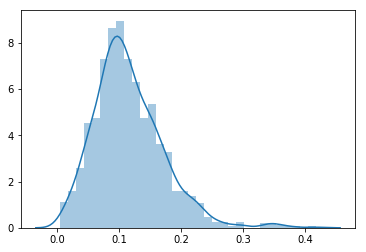

In [34]:
sns.distplot(dists)

In [35]:
max(test)

18.668867657485308

In [36]:
min(test)

-18.342024814279775

In [37]:
vals = [i for i in range(5,55,5)]
maes = []
mses = []
rmses = []
for val in vals:
    preds,dists, mae, mse, rmse = get_preds(test, start_ind,n=val)
    maes.append(mae)
    mses.append(mse)
    rmses.append(rmse)

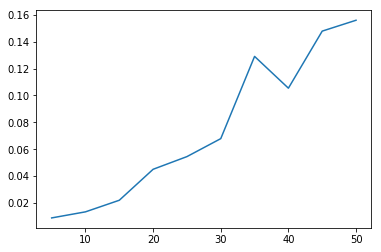

In [38]:
plt.plot(vals,maes)

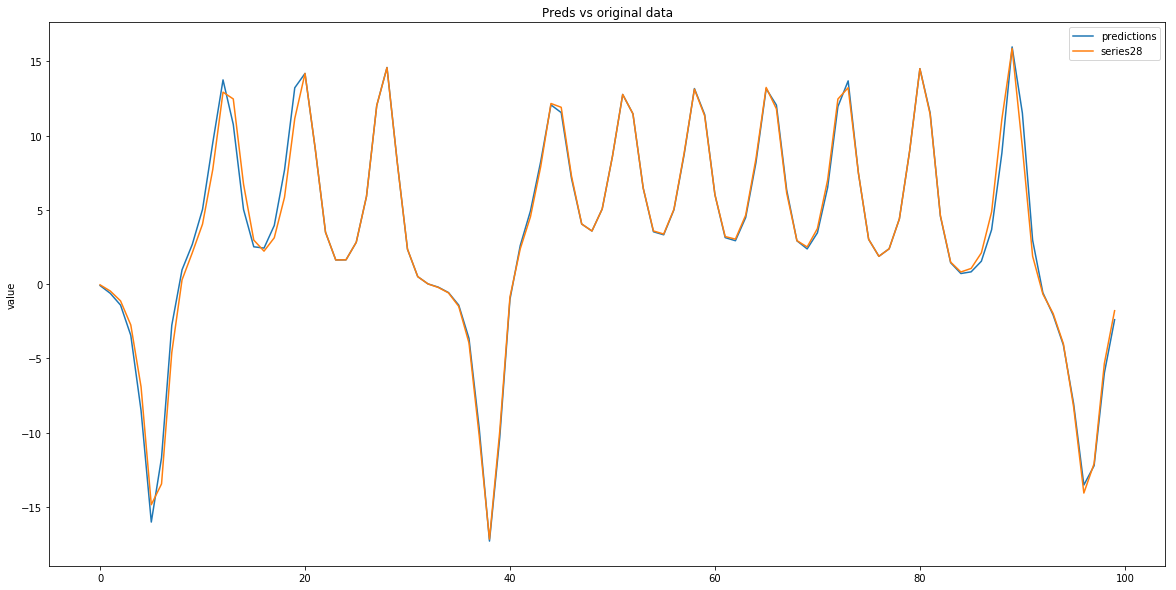

In [43]:
plt.figure(figsize=(20,10))
plt.plot([i for i in range(100)], preds[:100], label='predictions')
plt.plot([i for i in range(100)], test[start_ind:start_ind+100], label='series28')
plt.title('Preds vs original data')
plt.ylabel('value')
plt.legend()
plt.show()

In [ ]:
def mse(true,pred):
    mse_ = 0
    for i in range(len(true)):
        mse_ += (true[i]-pred[i])**2
    return mse_/len(true)

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
mean_absolute_error(test[start_ind:start_ind+preds_len], preds)

In [ ]:
test[7:17]

In [ ]:
from seaborn import distplot

In [ ]:
distplot(dists)

In [50]:
def predict_point_eps(series,i,eps, true_val):
    min_dist = 100000
    cur_pred = 0
    zvecs_list = get_zvecs_for_algos(series,i,algos)
    preds = []
    dists = []
    eps_holds = []
    for i in range(len(zvecs_list)):
        pred, dist = predict_zvec(algos[i],zvecs_list[i])
        preds.append(pred)
        dists.append(dist)
        eps_hold = 1*(abs(true_val - pred) < eps)
        eps_holds.append(eps_hold)
        if dist < min_dist:
            min_dist = dist
            cur_pred = pred
    if sum(eps_holds) == 0:
        return cur_pred,min_dist
    inds = np.where(np.array(eps_holds) > 0)[0]
    dists = [dists[i] for i in inds]
    preds = [preds[i] for i in inds]
    return np.mean(preds), np.mean(dists)

In [51]:
def get_preds_eps(series,start,n=20,eps=0.2):
    preds = []
    dists = []
    errors = []
    sq_errors = []
    step = 0
    series_dummy = series[:start]
    for i in range(start,start+preds_len):
        if step >= n:
            preds.append(series[i])
            series_dummy.append(series[i])
            step += 1
            if step == n + 7:
                step = 0
        else:
            pred, dist = predict_point_eps(series_dummy,i,eps, series[i])
            dists.append(dist)
            preds.append(pred)
            errors.append(abs(series[i]-pred) / max(series))
            mse = (series[i] / max(series) - pred/max(series))**2
            sq_errors.append(mse)
            series_dummy.append(pred)
            step += 1
    return preds, dists, np.mean(errors), np.mean(sq_errors), np.mean(sq_errors)**(1/2)

In [52]:
preds_eps, dists_eps, mae_eps, mse_eps, rmse_eps = get_preds_eps(test,start_ind,n=50,eps=0.2)

In [ ]:
plt.figure(figsize=(20,10))
plt.plot([i for i in range(preds_len)], preds_eps[:preds_len], label='predictions')
plt.plot([i for i in range(preds_len)], test[start_ind:start_ind+preds_len], label='series28')
plt.title('Preds vs original data')
plt.ylabel('value')
plt.legend()
plt.show()

In [53]:
vals = [i for i in range(5,55,5)]
maes_eps_02 = []
mses_eps_02 = []
rmses_eps_02 = []
for val in vals:
    preds,dists, mae, mse, rmse = get_preds_eps(test, start_ind,n=val,eps=0.2)
    maes_eps_02.append(mae)
    mses_eps_02.append(mse)
    rmses_eps_02.append(rmse)

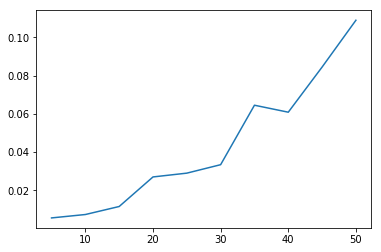

In [55]:
plt.plot(vals,maes_eps_02)

In [56]:
vals = [i for i in range(5,55,5)]
maes_eps_01 = []
mses_eps_01 = []
rmses_eps_01 = []
for val in vals:
    preds,dists, mae, mse, rmse = get_preds_eps(test, start_ind,n=val,eps=0.1)
    maes_eps_01.append(mae)
    mses_eps_01.append(mse)
    rmses_eps_01.append(rmse)

In [58]:
vals = [i for i in range(5,55,5)]
maes_eps_005 = []
mses_eps_005 = []
rmses_eps_005 = []
for val in vals:
    preds,dists, mae, mse, rmse = get_preds_eps(test, start_ind,n=val,eps=0.05)
    maes_eps_005.append(mae)
    mses_eps_005.append(mse)
    rmses_eps_005.append(rmse)

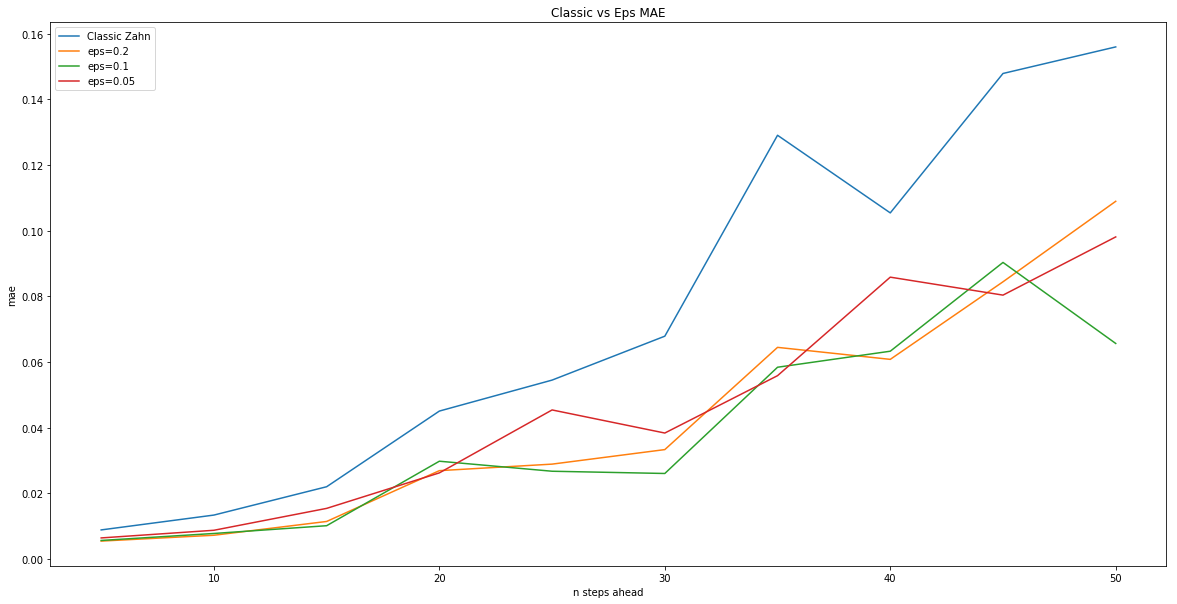

In [59]:
plt.figure(figsize=(20,10))
plt.plot(vals, maes, label='Classic Zahn')
plt.plot(vals, maes_eps_02, label='eps=0.2')
plt.plot(vals, maes_eps_01, label='eps=0.1')
plt.plot(vals, maes_eps_005, label='eps=0.05')
plt.title('Classic vs Eps MAE')
plt.ylabel('mae')
plt.xlabel('n steps ahead')
plt.legend()
plt.show()

In [ ]:
def get_preds_lle(series,start,n=100):
    preds = []
    dists = []
    errors = []
    errors_mat = []
    step = 0
    series_dummy = series[:start]
    for i in range(start,start+preds_len):
        if step >= n:
            if errors:
                errors_mat.append(np.log(np.array(errors)))
                errors = []
            preds.append(series[i])
            series_dummy.append(series[i])
            step += 1
            if step == n + 7:
                step = 0
        else:
            pred, dist = predict_point(series_dummy,i)
            dists.append(dist)
            preds.append(pred)
            errors.append(abs(series[i]-pred))
            series_dummy.append(pred)
            step += 1
    mat = np.array(errors_mat).T
    ks = np.array([i for i in range(1,n+1)]).reshape(n,1)
    return np.linalg.lstsq(ks, mat, rcond=None)[0]

In [ ]:
lles = get_preds_lle(test,start_ind)

In [ ]:
np.mean(lles)

In [ ]:
lles

In [ ]:
distplot(lles)